Getting started with neural networks: Classification and regression

Classifying movie reviews! 

In [16]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The data consists of lists of words of different lengths! We need to address this! We could either pad the lists so that they all have the same length, or use multi-hot encoding! We'll do multi-hot encoding in this example, this consists of turning our data, for instance [8, 5] into a 10,000 dimensional vector that would be zeros except for indices 8 and 5!

In [17]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence: # each j is a individual review from the imdb dataset!
            results[i, j] = 1 # sets specific indices of results[i], to 1's if the contain that word from the dictionary! 
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# this converst our labels into vectors!

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

For a binary classification problem, generally the best loss to choise is binary_crossentropy! Crossentropy is a quantity that measures the distance between probability distributions, or in this case, the distance between the ground-truth distribution and our predictions! 

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([layers.Dense(16, activation="relu"), layers.Dense(16, activation="relu"), layers.Dense(1, activation="sigmoid")])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.5164 - accuracy: 0.7929 - val_loss: 0.4157 - val_accuracy: 0.8429
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3088 - accuracy: 0.9013 - val_loss: 0.3038 - val_accuracy: 0.8904
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2249 - accuracy: 0.9289 - val_loss: 0.2887 - val_accuracy: 0.8884
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1773 - accuracy: 0.9437 - val_loss: 0.2728 - val_accuracy: 0.8927
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1469 - accuracy: 0.9533 - val_loss: 0.2855 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1215 - accuracy: 0.9616 - val_loss: 0.3263 - val_accuracy: 0.8756
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1021 - accuracy: 0.9684 - val_loss: 0.3418 - val_accuracy: 0.8728
Epoch 8/20
30/30 [

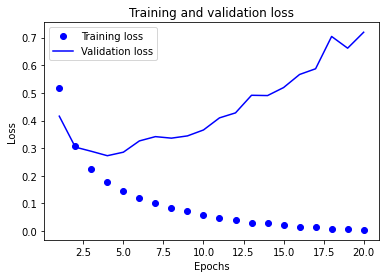

In [19]:
# the fit() method returns a History object, which is a dictionary containing data about everything that happened during training, lets look at it!

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

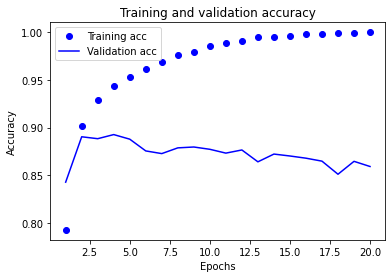

In [20]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

From these plots we can see that the model is overfitting to the training dataset! It does not perform well on the validation dataset, despite performing well on the training dataset! Lets retrain with fewer epochs.

Epoch 1/4
30/30 [==============================] - 1s 27ms/step - loss: 0.4852 - accuracy: 0.7982 - val_loss: 0.3497 - val_accuracy: 0.8786
Epoch 2/4
30/30 [==============================] - 0s 10ms/step - loss: 0.2772 - accuracy: 0.9051 - val_loss: 0.3343 - val_accuracy: 0.8575
Epoch 3/4
30/30 [==============================] - 0s 15ms/step - loss: 0.2032 - accuracy: 0.9315 - val_loss: 0.2795 - val_accuracy: 0.8874
Epoch 4/4
30/30 [==============================] - 0s 12ms/step - loss: 0.1575 - accuracy: 0.9474 - val_loss: 0.2803 - val_accuracy: 0.8870


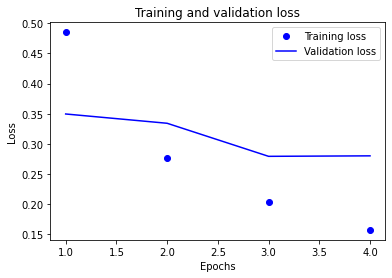

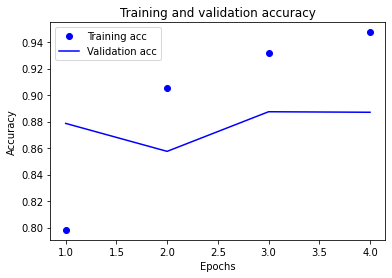

782/782 [==============================] - 1s 1ms/step - loss: 0.3016 - accuracy: 0.8784
[0.3015509843826294, 0.8784400224685669]


In [21]:
model = keras.Sequential([layers.Dense(16, activation="relu"), layers.Dense(64, activation="relu"), layers.Dense(1, activation="sigmoid")])

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

results = model.evaluate(x_test, y_test)

print(results)

This model performs much better! ~88% accuracy, SOTA is 95%! 

To use this trained model, we can use the predict() method!

In [22]:
model.predict(x_test)

array([[0.16003317],
       [0.9995746 ],
       [0.82577914],
       ...,
       [0.06523731],
       [0.07119929],
       [0.59549105]], dtype=float32)

Classifying newswires: A multiclass classification example! 

In [34]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [35]:
# uses our vectorize_sequences() method from earlier to create a vector of size 10000 with our words in it!

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(train_labels.shape)

# This is one-hot encoding! Currently the labels are a vector of 8982 (the training set size) integers from 0-45 depending on the topic label. (there are 46 topics!)
# one-hot encoding takes this vector and converts it into a rank 2 tensor where rows are labels of each newswires

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

print(y_train.shape)

(8982,)
(8982, 46)


In [69]:
# There is a built-in method in keras to perform one-hot encoding!

import tensorflow

y_train = tensorflow.keras.utils.to_categorical(train_labels)
y_test = tensorflow.keras.utils.to_categorical(test_labels)

In [70]:
# lets build our model, we will need larger layers than the previous binary classification task!

model = keras.Sequential([layers.Dense(64, activation="relu"), layers.Dense(64, activation="relu"), layers.Dense(46, activation="softmax")])

# We are using a different activation function for the final layer, the softmax function! This will create an output where output[i] is the probability that the sample belongs to class i. 

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))



Epoch 1/9
16/16 [==============================] - 1s 18ms/step - loss: 2.6874 - accuracy: 0.5274 - val_loss: 1.7624 - val_accuracy: 0.6350
Epoch 2/9
16/16 [==============================] - 0s 6ms/step - loss: 1.4342 - accuracy: 0.7110 - val_loss: 1.3108 - val_accuracy: 0.7230
Epoch 3/9
16/16 [==============================] - 0s 7ms/step - loss: 1.0628 - accuracy: 0.7742 - val_loss: 1.1414 - val_accuracy: 0.7540
Epoch 4/9
16/16 [==============================] - 0s 7ms/step - loss: 0.8341 - accuracy: 0.8246 - val_loss: 1.0608 - val_accuracy: 0.7560
Epoch 5/9
16/16 [==============================] - 0s 6ms/step - loss: 0.6647 - accuracy: 0.8617 - val_loss: 1.0019 - val_accuracy: 0.7930
Epoch 6/9
16/16 [==============================] - 0s 7ms/step - loss: 0.5323 - accuracy: 0.8931 - val_loss: 0.9202 - val_accuracy: 0.8160
Epoch 7/9
16/16 [==============================] - 0s 9ms/step - loss: 0.4240 - accuracy: 0.9137 - val_loss: 0.8832 - val_accuracy: 0.8190
Epoch 8/9
16/16 [=========

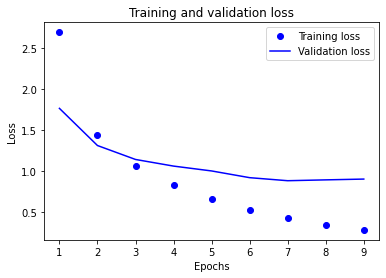

In [71]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

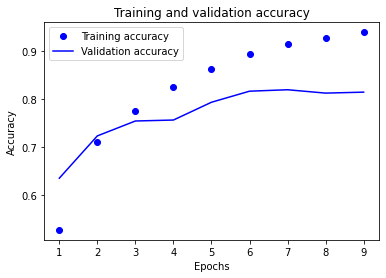

71/71 [==============================] - 0s 2ms/step - loss: 1.0086 - accuracy: 0.7845


[1.0085585117340088, 0.7845057845115662]

In [72]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model.evaluate(x_test, y_test)

In this case since we are using the softmax function, due to the fact we are doing a single-label classification problem, the greatest predicted "probability" is the classification assigned by the network. We can use the argmax() method to quickly find it.

In [73]:
predictions = model.predict(x_test)

# This is the prediction from our model of the first newswire topic in our test dataset!

print(np.argmax(predictions[0]))

3


In [74]:
# If we were to have encoded the labels by casting them as integer tensors instead of using one-hot encoding this means we would have to use a different loss function!

y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# The sparse categorical crossentropy is exactly the same as the other mathematically, it just takes a different input format!

Predicting house prices: A regression example!

In [6]:
from tensorflow.keras.datasets import boston_housing
from tensorflow import keras

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


It is best practise to normalise feature data, this is because if features have vastly different ranges it can make learning difficult (e.g. house price between 40-100 thousands vs number of bedrooms!)

It is very improtant to notice that we use the mean and std from the training data to normalise the test data. You should never use quanitities calculated from the test data in any of your work flow! 

In [7]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [10]:
from keras import layers

def build_model():
    #Since our dataset is quite small we want to avoid overfitting, using a small network is one way to mitigate this risk!
    model = keras.Sequential([layers.Dense(64, activation="relu"), layers.Dense(64, activation="relu"), layers.Dense(1)])

    # It is typical to not use a activation function in the final laer of a scalar regression problem!
    # mse is the mean squared error, this is widely used as a loss function for regression problems. mae is mean absolute error, in this case a mae=1 to would mean the prediction is off by $1000. 
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

    return model


Since the dataset is small, the validation dataset is even smaller! This means we might have a high variance with regards to the validation split (i.e. the validation score will change a lot depending on which points are chosen for the validation set!) The best practise in these situations is K-fold cross-validation! This invloves splitting the data into K partitions and using a single partition as the validation (training on the K-1 partitions) set K times, averaging the final score. Each instance of this is known as a fold, hence K-fold! 

In [11]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] # points between i and i + 1 (x num_val_samples) are included in the validation dataset, this shifts along as i increases
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0) # everything else is included in the training dataset!
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=16, verbose=0) # verbose = 0 trains the model in silent mode! No output to the screen
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
# print(f"The mean mae across the K fold's is {np.mean(all_scores)}")

Processing fold #0


2022-04-08 09:54:41.343584: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 09:54:42.052051: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 09:54:42.052152: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-08 09:54:42.057117: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Processing fold #1
Processing fold #2
Processing fold #3


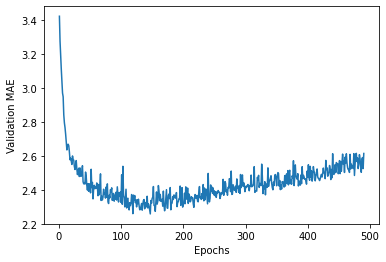

In [14]:
import matplotlib.pyplot as plt

truncated_mae_history = average_mae_history[10:]

plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

We can see it starts overfitting after approx 130 epochs!

In conclusion:
    - For regression MSE is used as a loss function, for each task there are loss functions that are more commonly used!
    - Same goes for metrics, here we used MAE!
    - When features have different ranges, they should be scaled independantly as a preprocessing step!
    - K-fold validation is a good way evaluate a model on a small dataset!
    - When datasets are small, use smaller networks to avoid overfitting!